## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  82.834395   447.707102  0.648391   5.695276  1.366972
1  51.219959  1689.847608  0.861902   9.906841  1.636618
2  62.243677   906.698072  0.836613   1.673297  1.611516
3  94.630278   644.739650  0.819119   1.808386  1.291702
4  27.061264   246.700015  0.173126  10.983120  0.952204


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.31586 | train_mse: 2.36847 | train_mae: 1.13827 |  0:00:00s
epoch 1  | loss: 0.87357 | train_mse: 2.48316 | train_mae: 1.0815  |  0:00:00s


epoch 2  | loss: 0.78287 | train_mse: 2.54733 | train_mae: 1.15736 |  0:00:00s
epoch 3  | loss: 0.87249 | train_mse: 2.34062 | train_mae: 1.03292 |  0:00:00s


epoch 4  | loss: 0.66238 | train_mse: 1.52572 | train_mae: 0.81976 |  0:00:00s
epoch 5  | loss: 0.61481 | train_mse: 1.0054  | train_mae: 0.71158 |  0:00:00s


epoch 6  | loss: 0.40842 | train_mse: 0.94818 | train_mae: 0.68259 |  0:00:01s


epoch 7  | loss: 0.57323 | train_mse: 1.08068 | train_mae: 0.71605 |  0:00:01s
epoch 8  | loss: 0.51149 | train_mse: 0.96853 | train_mae: 0.67144 |  0:00:01s


epoch 9  | loss: 0.56853 | train_mse: 0.90959 | train_mae: 0.64652 |  0:00:01s
epoch 10 | loss: 0.60389 | train_mse: 1.25732 | train_mae: 0.7518  |  0:00:01s


epoch 11 | loss: 0.35368 | train_mse: 1.23598 | train_mae: 0.72437 |  0:00:01s
epoch 12 | loss: 0.36954 | train_mse: 0.82515 | train_mae: 0.62992 |  0:00:01s
epoch 13 | loss: 0.34944 | train_mse: 0.9417  | train_mae: 0.62155 |  0:00:01s


epoch 14 | loss: 0.56561 | train_mse: 0.85328 | train_mae: 0.57418 |  0:00:02s
epoch 15 | loss: 0.29207 | train_mse: 0.48568 | train_mae: 0.49421 |  0:00:02s


epoch 16 | loss: 0.39914 | train_mse: 0.5388  | train_mae: 0.51495 |  0:00:02s
epoch 17 | loss: 0.37234 | train_mse: 0.45637 | train_mae: 0.462   |  0:00:02s
epoch 18 | loss: 0.50344 | train_mse: 0.45716 | train_mae: 0.48198 |  0:00:02s


epoch 19 | loss: 0.33321 | train_mse: 0.27766 | train_mae: 0.40048 |  0:00:02s
epoch 20 | loss: 0.41537 | train_mse: 0.28296 | train_mae: 0.4069  |  0:00:02s


epoch 21 | loss: 0.25948 | train_mse: 0.25207 | train_mae: 0.39001 |  0:00:02s
epoch 22 | loss: 0.34866 | train_mse: 0.2609  | train_mae: 0.37904 |  0:00:02s


epoch 23 | loss: 0.37142 | train_mse: 0.20766 | train_mae: 0.34571 |  0:00:03s
epoch 24 | loss: 0.43532 | train_mse: 0.22587 | train_mae: 0.34357 |  0:00:03s


epoch 25 | loss: 0.40243 | train_mse: 0.23863 | train_mae: 0.34695 |  0:00:03s
epoch 26 | loss: 0.21279 | train_mse: 0.31014 | train_mae: 0.37107 |  0:00:03s
epoch 27 | loss: 0.4916  | train_mse: 0.33768 | train_mae: 0.39326 |  0:00:03s


epoch 28 | loss: 0.33589 | train_mse: 0.27625 | train_mae: 0.36009 |  0:00:03s
epoch 29 | loss: 0.31813 | train_mse: 0.24035 | train_mae: 0.35602 |  0:00:03s


epoch 30 | loss: 0.37122 | train_mse: 0.25237 | train_mae: 0.37983 |  0:00:03s
epoch 31 | loss: 0.27089 | train_mse: 0.3446  | train_mae: 0.40349 |  0:00:03s
epoch 32 | loss: 0.28714 | train_mse: 0.4021  | train_mae: 0.42987 |  0:00:04s


epoch 33 | loss: 0.33029 | train_mse: 0.52632 | train_mae: 0.47257 |  0:00:04s
epoch 34 | loss: 0.56703 | train_mse: 0.35989 | train_mae: 0.41292 |  0:00:04s


epoch 35 | loss: 0.36005 | train_mse: 0.18389 | train_mae: 0.32108 |  0:00:04s
epoch 36 | loss: 0.25244 | train_mse: 0.18952 | train_mae: 0.3152  |  0:00:04s


epoch 37 | loss: 0.30363 | train_mse: 0.17912 | train_mae: 0.31254 |  0:00:04s
epoch 38 | loss: 0.39633 | train_mse: 0.29783 | train_mae: 0.39189 |  0:00:04s
epoch 39 | loss: 0.3434  | train_mse: 0.3362  | train_mae: 0.4177  |  0:00:04s


epoch 40 | loss: 0.35053 | train_mse: 0.34165 | train_mae: 0.40745 |  0:00:04s
epoch 41 | loss: 0.29815 | train_mse: 0.36571 | train_mae: 0.41085 |  0:00:05s


epoch 42 | loss: 0.46245 | train_mse: 0.4217  | train_mae: 0.40823 |  0:00:05s
epoch 43 | loss: 0.44162 | train_mse: 0.3071  | train_mae: 0.3559  |  0:00:05s


epoch 44 | loss: 0.36446 | train_mse: 0.15283 | train_mae: 0.28786 |  0:00:05s
epoch 45 | loss: 0.37042 | train_mse: 0.14739 | train_mae: 0.28778 |  0:00:05s


epoch 46 | loss: 0.31411 | train_mse: 0.1735  | train_mae: 0.31002 |  0:00:05s
epoch 47 | loss: 0.38274 | train_mse: 0.26    | train_mae: 0.36383 |  0:00:05s
epoch 48 | loss: 0.17097 | train_mse: 0.26396 | train_mae: 0.36888 |  0:00:05s


epoch 49 | loss: 0.19036 | train_mse: 0.26533 | train_mae: 0.3664  |  0:00:06s
epoch 50 | loss: 0.26623 | train_mse: 0.21944 | train_mae: 0.33484 |  0:00:06s


epoch 51 | loss: 0.30976 | train_mse: 0.30986 | train_mae: 0.35239 |  0:00:06s
epoch 52 | loss: 0.27403 | train_mse: 0.34183 | train_mae: 0.35003 |  0:00:06s


epoch 53 | loss: 0.22252 | train_mse: 0.20881 | train_mae: 0.30978 |  0:00:06s
epoch 54 | loss: 0.2733  | train_mse: 0.11033 | train_mae: 0.26707 |  0:00:06s
epoch 55 | loss: 0.34828 | train_mse: 0.11456 | train_mae: 0.27654 |  0:00:06s


epoch 56 | loss: 0.30375 | train_mse: 0.12887 | train_mae: 0.27542 |  0:00:06s
epoch 57 | loss: 0.20909 | train_mse: 0.10389 | train_mae: 0.25356 |  0:00:06s
epoch 58 | loss: 0.22056 | train_mse: 0.1249  | train_mae: 0.27168 |  0:00:06s


epoch 59 | loss: 0.41135 | train_mse: 0.1435  | train_mae: 0.28898 |  0:00:07s
epoch 60 | loss: 0.32616 | train_mse: 0.14436 | train_mae: 0.28935 |  0:00:07s


epoch 61 | loss: 0.24251 | train_mse: 0.13678 | train_mae: 0.27467 |  0:00:07s
epoch 62 | loss: 0.17958 | train_mse: 0.13483 | train_mae: 0.27904 |  0:00:07s


epoch 63 | loss: 0.33909 | train_mse: 0.12104 | train_mae: 0.27195 |  0:00:07s
epoch 64 | loss: 0.33304 | train_mse: 0.13014 | train_mae: 0.28075 |  0:00:07s


epoch 65 | loss: 0.18178 | train_mse: 0.12982 | train_mae: 0.27615 |  0:00:07s
epoch 66 | loss: 0.30065 | train_mse: 0.1264  | train_mae: 0.27338 |  0:00:07s
epoch 67 | loss: 0.30804 | train_mse: 0.11454 | train_mae: 0.25876 |  0:00:07s


epoch 68 | loss: 0.21502 | train_mse: 0.08496 | train_mae: 0.2297  |  0:00:08s
epoch 69 | loss: 0.17826 | train_mse: 0.138   | train_mae: 0.25242 |  0:00:08s


epoch 70 | loss: 0.21811 | train_mse: 0.14397 | train_mae: 0.26521 |  0:00:08s
epoch 71 | loss: 0.25857 | train_mse: 0.11213 | train_mae: 0.26285 |  0:00:08s
epoch 72 | loss: 0.23812 | train_mse: 0.10014 | train_mae: 0.25319 |  0:00:08s


epoch 73 | loss: 0.25405 | train_mse: 0.13962 | train_mae: 0.29679 |  0:00:08s
epoch 74 | loss: 0.25463 | train_mse: 0.16324 | train_mae: 0.29602 |  0:00:08s
epoch 75 | loss: 0.27325 | train_mse: 0.11229 | train_mae: 0.26114 |  0:00:08s


epoch 76 | loss: 0.30213 | train_mse: 0.11347 | train_mae: 0.26506 |  0:00:08s
epoch 77 | loss: 0.23383 | train_mse: 0.14456 | train_mae: 0.29129 |  0:00:08s
epoch 78 | loss: 0.14419 | train_mse: 0.14435 | train_mae: 0.28418 |  0:00:09s


epoch 79 | loss: 0.19436 | train_mse: 0.13849 | train_mae: 0.2799  |  0:00:09s
epoch 80 | loss: 0.16476 | train_mse: 0.13569 | train_mae: 0.28638 |  0:00:09s


epoch 81 | loss: 0.23029 | train_mse: 0.13973 | train_mae: 0.29247 |  0:00:09s
epoch 82 | loss: 0.32922 | train_mse: 0.13989 | train_mae: 0.28801 |  0:00:09s
epoch 83 | loss: 0.23966 | train_mse: 0.17275 | train_mae: 0.31511 |  0:00:09s


epoch 84 | loss: 0.141   | train_mse: 0.21752 | train_mae: 0.33998 |  0:00:09s
epoch 85 | loss: 0.24312 | train_mse: 0.25221 | train_mae: 0.37527 |  0:00:09s


epoch 86 | loss: 0.41194 | train_mse: 0.22994 | train_mae: 0.35867 |  0:00:10s


epoch 87 | loss: 0.3175  | train_mse: 0.22646 | train_mae: 0.35246 |  0:00:10s


epoch 88 | loss: 0.2232  | train_mse: 0.17945 | train_mae: 0.31796 |  0:00:10s
epoch 89 | loss: 0.18575 | train_mse: 0.09774 | train_mae: 0.24942 |  0:00:10s


epoch 90 | loss: 0.21944 | train_mse: 0.08878 | train_mae: 0.236   |  0:00:10s


epoch 91 | loss: 0.36476 | train_mse: 0.10913 | train_mae: 0.24869 |  0:00:11s
epoch 92 | loss: 0.22672 | train_mse: 0.09517 | train_mae: 0.25356 |  0:00:11s


epoch 93 | loss: 0.27948 | train_mse: 0.1276  | train_mae: 0.28826 |  0:00:11s


epoch 94 | loss: 0.16843 | train_mse: 0.1473  | train_mae: 0.31049 |  0:00:11s
epoch 95 | loss: 0.33035 | train_mse: 0.15131 | train_mae: 0.30429 |  0:00:12s


epoch 96 | loss: 0.16892 | train_mse: 0.16297 | train_mae: 0.30384 |  0:00:12s
epoch 97 | loss: 0.17508 | train_mse: 0.16349 | train_mae: 0.29866 |  0:00:12s


epoch 98 | loss: 0.33761 | train_mse: 0.1495  | train_mae: 0.30613 |  0:00:12s
epoch 99 | loss: 0.24482 | train_mse: 0.15508 | train_mae: 0.30934 |  0:00:12s
epoch 100| loss: 0.18208 | train_mse: 0.14718 | train_mae: 0.30399 |  0:00:12s


epoch 101| loss: 0.11243 | train_mse: 0.13384 | train_mae: 0.28856 |  0:00:12s
epoch 102| loss: 0.23043 | train_mse: 0.19322 | train_mae: 0.31843 |  0:00:12s


epoch 103| loss: 0.14281 | train_mse: 0.18564 | train_mae: 0.31732 |  0:00:13s


epoch 104| loss: 0.23934 | train_mse: 0.11932 | train_mae: 0.27671 |  0:00:13s
epoch 105| loss: 0.39766 | train_mse: 0.17    | train_mae: 0.32296 |  0:00:13s


epoch 106| loss: 0.32268 | train_mse: 0.14489 | train_mae: 0.2964  |  0:00:13s
epoch 107| loss: 0.26132 | train_mse: 0.10959 | train_mae: 0.26634 |  0:00:13s
epoch 108| loss: 0.12511 | train_mse: 0.11506 | train_mae: 0.26861 |  0:00:13s


epoch 109| loss: 0.16172 | train_mse: 0.15384 | train_mae: 0.29211 |  0:00:13s
epoch 110| loss: 0.13783 | train_mse: 0.16511 | train_mae: 0.31597 |  0:00:14s


epoch 111| loss: 0.13753 | train_mse: 0.16642 | train_mae: 0.31534 |  0:00:14s


epoch 112| loss: 0.13894 | train_mse: 0.18579 | train_mae: 0.29436 |  0:00:14s
epoch 113| loss: 0.20898 | train_mse: 0.23191 | train_mae: 0.31579 |  0:00:14s


epoch 114| loss: 0.32638 | train_mse: 0.14745 | train_mae: 0.28957 |  0:00:14s
epoch 115| loss: 0.25754 | train_mse: 0.11724 | train_mae: 0.27401 |  0:00:14s


epoch 116| loss: 0.30991 | train_mse: 0.15402 | train_mae: 0.30274 |  0:00:14s
epoch 117| loss: 0.53644 | train_mse: 0.14284 | train_mae: 0.29837 |  0:00:14s


epoch 118| loss: 0.41266 | train_mse: 0.1317  | train_mae: 0.29583 |  0:00:15s

Early stopping occurred at epoch 118 with best_epoch = 68 and best_train_mae = 0.2297
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

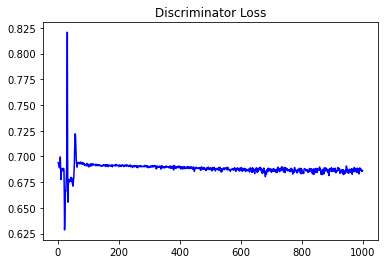

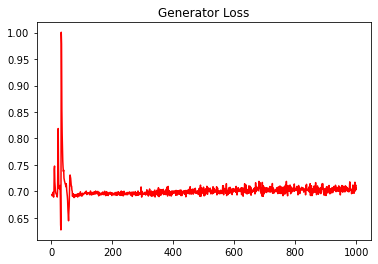

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.28532927564125693


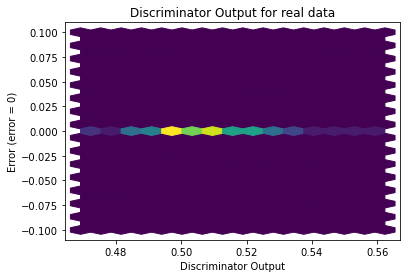

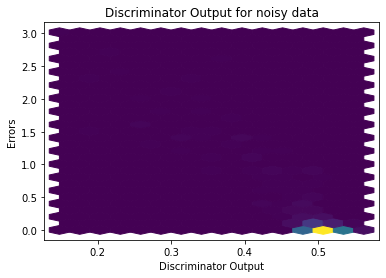

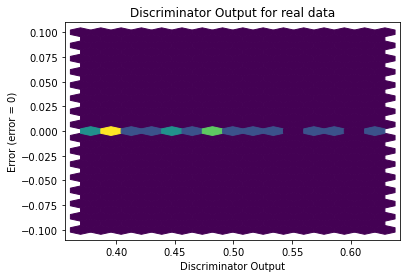

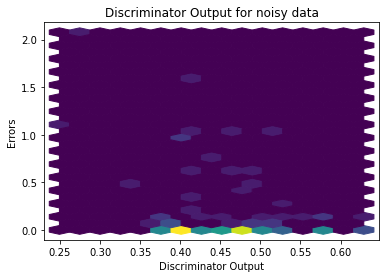

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


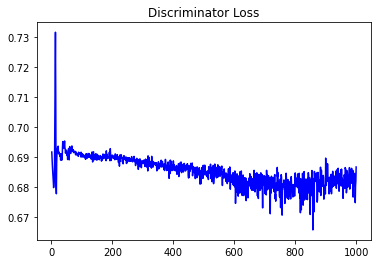

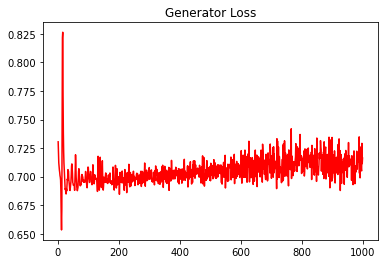

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.35835618997503477


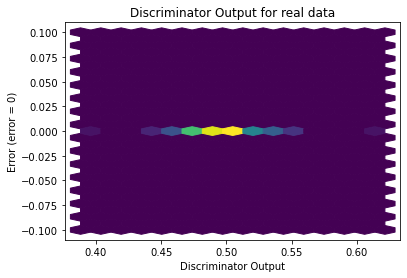

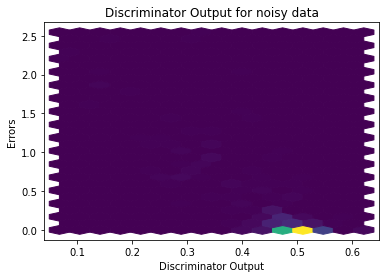

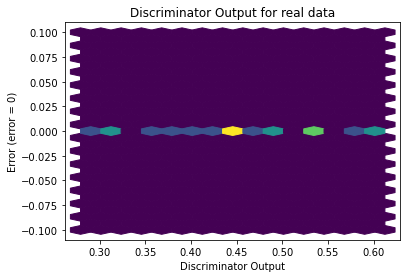

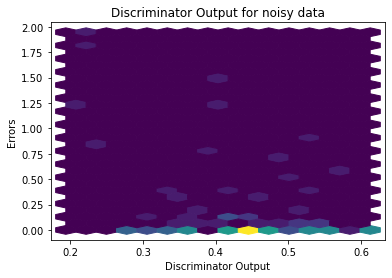

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9647]], requires_grad=True)
